<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

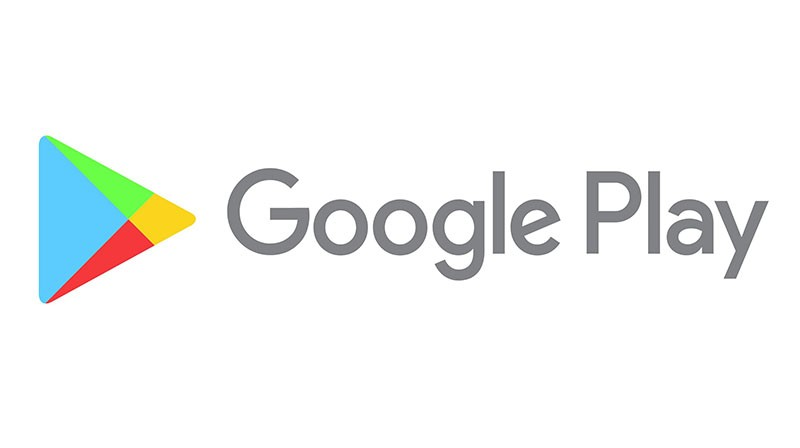

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Load and Prepare Data

In [ ]:
df = pd.read_csv('./googleplaystore.csv')

df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.tail()

## EDA

In [ ]:
df.isnull().sum()

In [ ]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df.isnull().sum()

In [ ]:
df.fillna(method='bfill', inplace=True)

In [ ]:
df.isna().sum()

## Data Preprocessing

In [ ]:
df

## Strorytelling - Visualization

In [ ]:
sns.histplot(data=df, x='Rating', bins=20)

In [ ]:
sns.catplot(data=df, x='Rating', y='Genres', kind='box', height=20, aspect=2)

In [ ]:
sns.pairplot(df[['Rating', 'Reviews', 'Size', 'Installs']])

In [ ]:
df.head()
# sns.heatmap(df[['Rating', 'Reviews', 'Size', 'Installs']].corr(), annot=True, cmap='coolwarm')

# df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size'] = df['Size'].fillna(df['Size'].mean())

# df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Installs'] = df['Installs'].fillna(df['Installs'].mean())

df['Reviews'] = df['Reviews'].str.replace('+', '').str.replace(',', '')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())

df.isna().sum()

In [ ]:
df[df['Reviews'] == '3.0M']

In [ ]:
sns.heatmap(df[['Rating', 'Reviews', 'Size', 'Installs']].corr(), annot=True, cmap='coolwarm')